# Avocado Price prediction- A regression problem<br>
Avocado is a fruit and it is liked by United state people mostly. it comes in different varieties and sizes. Product code is also given to them. There has also grown in two ways one is conventional and second one in organic ways. it is labeled as organic after meeting all the organic compliance patameters.<br><br>
**About dataset:**<br>
Dataset has pure 1517 observations with 13 columns including one target. Dataset has lot of missing values which needs treatment. features details are mentioned below<br>

**Feature details**<br>
Date == The date of the observation<br>
AveragePrice == the average price of a single avocado<br>
type == conventional or organic<br>
year == The year<br>
Region == the city or region of the observation <br>
Total Volume == Total number of avocados sold <br>
4046 ==  Total number of avocados with PLU 4046 sold<br>
4225 ==  Total number of avocados with PLU 4225 sold<br>
4770 ==  Total number of avocados with PLU 4770 sold<>
Total Bags == Numbe of bags used 
Small Bags == number of small bag used
large bags =  Number of large bag used
XLarge bags = number of Xtra lage bag used



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
avocado_ds = pd.read_csv("avocado.csv")

In [2]:
avocado_ds.head() # checking top 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado_ds.tail()# checking last 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Checking first 5 and last 5 observations, looking at the tail of the data, we have missing data in the dataset.<br>Also we ahve unnamed column in it which seems an index values. we will delete that. let check more info about the dataset's features

In [4]:
avocado_ds.info() # checking information about the data set and its columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Info function gives information that no missing value in the data but while checking the tail, it has obsered some missing data. we will correct that. <br> we have 13 columsn including Target column. 3 columsn are objects type and resta are all numeric in nature. we have date column also which is current object type, we will change its data type as well to datetime

In [5]:
# deleting the unnamed column from the dataset as it has its own index
avocado_ds.drop("Unnamed: 0",axis=1, inplace = True)

In [6]:
# checking the shape of the dataset and columns in it
print(avocado_ds.shape)
print(avocado_ds.columns)

(18249, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


Unnamed has been deleted successfully from the data set. now we will clean the dataset.

In [7]:
# creating deep copy 
avocado_ds_work_file = avocado_ds.copy()

In [8]:
# replace the NaN with np.nan just to ensure it NaN wasnt actual NAN. 
avocado_ds_work_file.replace({"NaN": np.nan},inplace=True)

In [9]:
# function for checking missing values
def missing_val(x):
  missing = {}
  for i in avocado_ds_work_file.columns:
    if avocado_ds_work_file[i].isnull().sum()> 0:
      missing[i] = avocado_ds_work_file[i].isnull().sum()
  print(missing,end = " ")

In [10]:
# calling the function
missing_val(avocado_ds_work_file)
print("\n")
print("Percentage of missing data:\n",avocado_ds_work_file.isnull().sum()/len(avocado_ds_work_file)*100)

{} 

Percentage of missing data:
 Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


we have seen that actual data points are only 1517 out of 16000 plus observations. approx 91% data is missing and we cant impute it, we will have to delete them.

In [11]:
# dropping null value
avocado_ds_work_file.dropna(inplace=True)
missing_val(avocado_ds_work_file) # checking missing value again

{} 

Missing value has been removed from the data set and we are ok to move ahead with othe analysis. 

In [12]:
# we have date column also in dataset and its datatype is objects, lets change into datetime format
avocado_ds_work_file["Date"] = pd.to_datetime(avocado_ds_work_file["Date"])
avocado_ds_work_file.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [13]:
# updating original files
avocado_ds = avocado_ds_work_file.copy()

In [14]:
avocado_ds.describe().round(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.00000,18249.00000
mean,1.40598,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.42651,2016.14790
std,0.40268,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.89465,0.93994
min,0.44000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,2015.00000
25%,1.10000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.00000,2015.00000
50%,1.37000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.00000,2016.00000
75%,1.66000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.50000,2017.00000
max,3.25000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.65000,2018.00000


By dignosing the data point, i have found that small and large bags are bifurcation of total bags so we can keep only total bags instead of them.we will treat them in coming section

In [15]:
avocado_ds.select_dtypes(include="object").describe()# describing the objects data types

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


From this we can understand that all Avocado belongs to one category which is conventional and dataset has maximum data from california state

# **EDA**

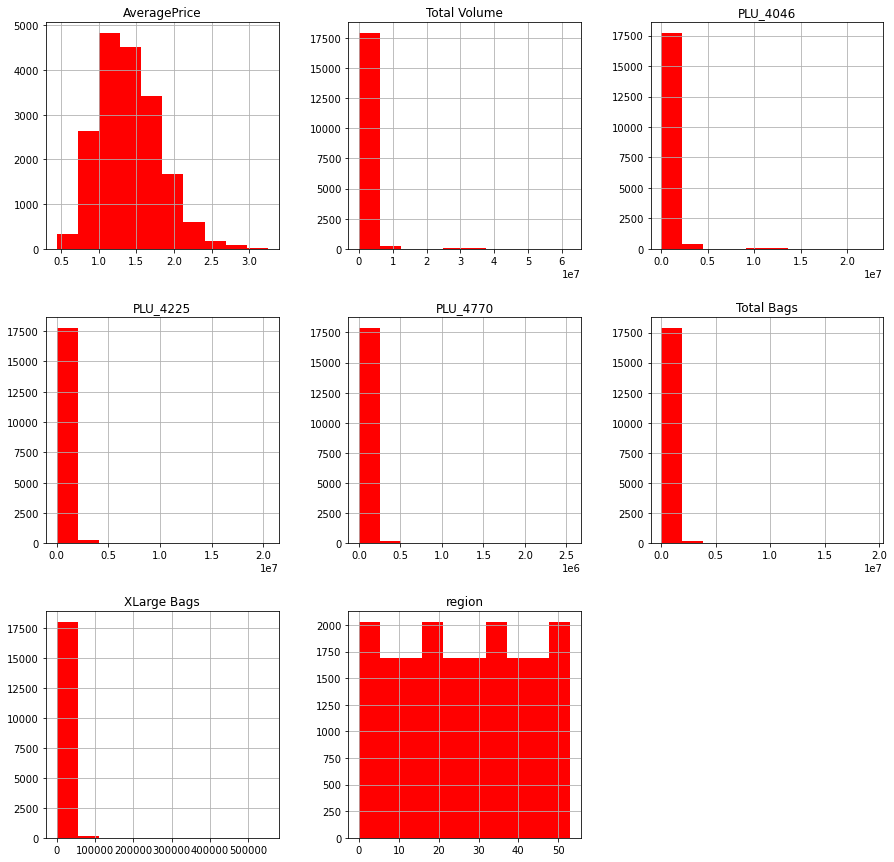

In [61]:
# checking the distribution of the numeric features
avocado_ds.select_dtypes(exclude="object").hist(figsize= (15,15), color='Red'); 

from total volume to XLage bags' features are right skewed. lets check the skewness of the data and after that we will do some analysis. so for checking the skewness we will take numeric data into another variable but before that we need to change the name of the 3 columsn which are written in number so that we can take them as features

In [17]:
avocado_ds.rename(columns={"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
# saving numeric data into a variable for nmeric operation
num_data = avocado_ds[["Total Volume",	"PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

In [19]:
# checking the skewness
num_data.skew()

Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

all the columns are skewed one as we have seen in the histogram. we will treat them after EDA.<br><br> i am creating a deep copy of the data and adding some more feature in the dataset for the analysis purpose from datetime columns.<br><br>

i have observed that date format is not same from top to tail, so changing it in a proper manner. DD-MM-YYYY

In [20]:
avocado_ds_analysis_data = avocado_ds.copy() # creating a copy for further analysis

In [21]:
avocado_ds_analysis_data["Date"] = pd.to_datetime(avocado_ds_analysis_data["Date"],format = "%d/%m/%Y") 

In [22]:
avocado_ds_analysis_data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Date format has been changed for entire column and it has seme for all observation

In [23]:
avocado_ds_analysis_data["Day"] =  avocado_ds_analysis_data["Date"].dt.day
avocado_ds_analysis_data["year"] =  avocado_ds_analysis_data["Date"].dt.year
avocado_ds_analysis_data["Month"] =  avocado_ds_analysis_data["Date"].dt.month
avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week

C:\Users\GURST\AppData\Local\Temp\ipykernel_8248\1715313840.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week


In [24]:
avocado_ds_analysis_data.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,49
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48


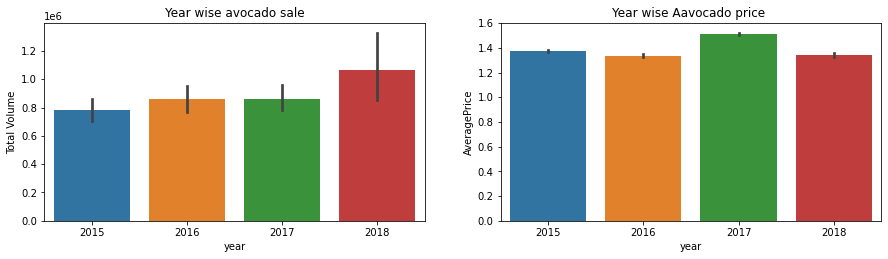

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x = "year", y = "Total Volume", data = avocado_ds_analysis_data)
plt.title("Year wise avocado sale");

plt.subplot(222)
sns.barplot(x = "year", y = "AveragePrice", data = avocado_ds_analysis_data)
plt.title("Year wise Aavocado price ");


Avocado number of sold in the year of 2015 is more as compared to 2016 but when we compare the year wise avocado price,  2016 year wise price average is high for as compared to 2015 and it can be 

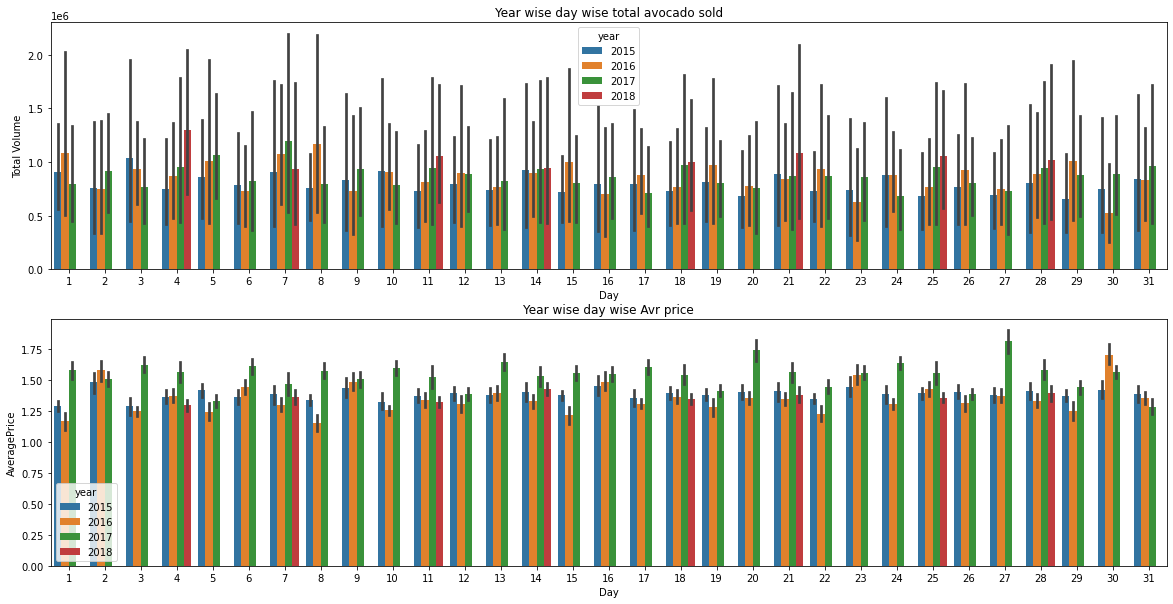

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Day", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise total avocado sold");

plt.subplot(212)
sns.barplot(x = "Day", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise Avr price");

out of 31 days, 13 days ,total sold count was higher in 2015 and rest are all in 2016.<br>
in 2016 on 11th and 30th , the avg price were high.

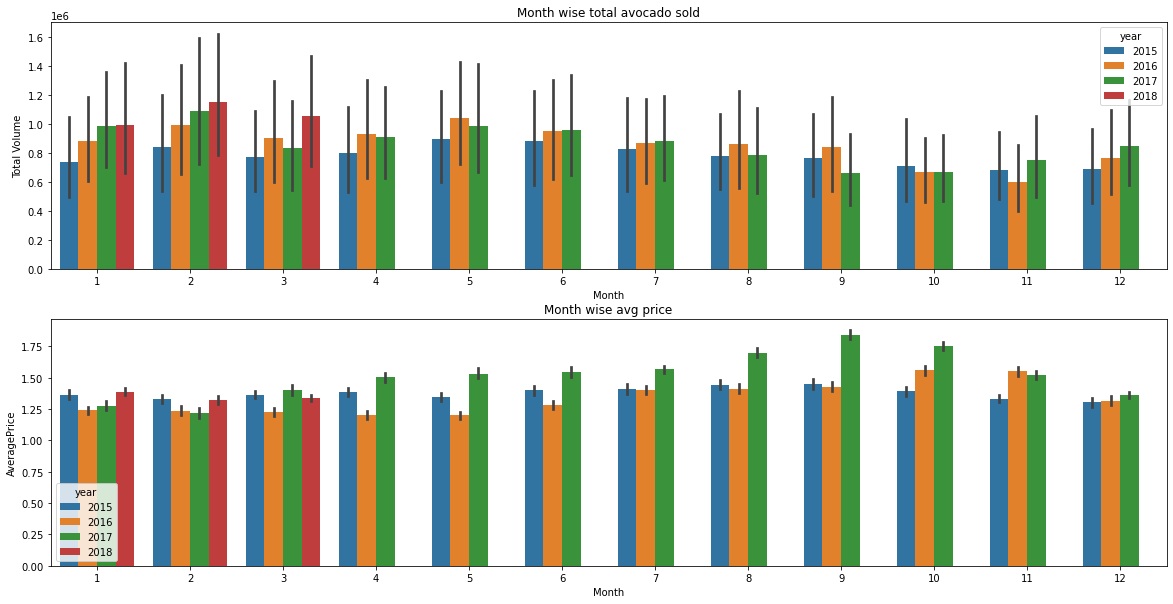

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Month", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "Month", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise avg price");

we see that in the 6th month in 2016 total volume is less but avg price is high. similarly we can observe the reverse of the same in 4th, 10 and 11 months, may be in these months organic avocado sold, i cannot be sure, having said that total volum of avocado is containing some other variate of avocado also because conventional avocado's count doesnt match with total volume.

Text(0.5, 1.0, 'week wise avg price')

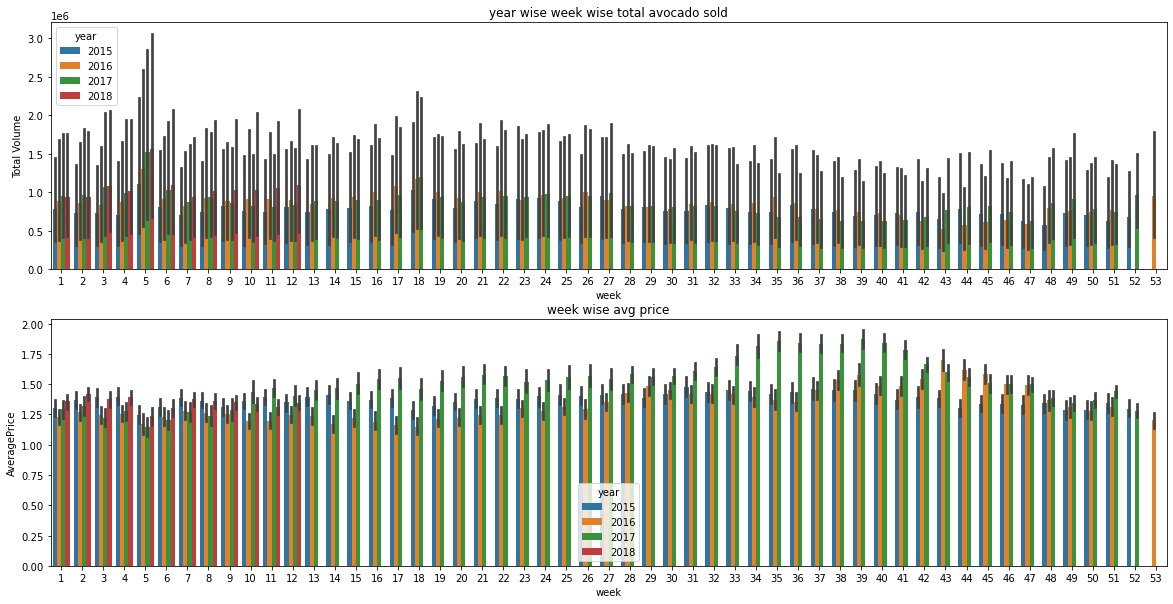

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "week", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("year wise week wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "week", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("week wise avg price")

week wise data looks cmulsy but we still make out some observations. <br>
after week 23, we see that ave price is high as compared to earlier weeks in most of the weeks. 

In [29]:
avocado_ds.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)

,Total Volume,AveragePrice
region,,
TotalUS,1.735130e+07,1.319024
West,3.215323e+06,1.272219
California,3.044324e+06,1.395325
SouthCentral,2.991952e+06,1.101243
Northeast,2.110299e+06,1.601923
Southeast,1.820232e+06,1.398018
GreatLakes,1.744505e+06,1.338550
Midsouth,1.503992e+06,1.404763
LosAngeles,1.502653e+06,1.216006


Top 5 region where it has consumed a lot and those are California,west,southcentral , northeast and greatlakes.

**lets check the outlier in the dataset but before do that we will delete some columns whcih just an extent of one column and share the similar observation**<br>
Small and large bag are the extension of the total bag thus we are deleteing it.type column has only one value that avocado is conventional type so we can delete it.
 

In [30]:
avocado_ds.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)

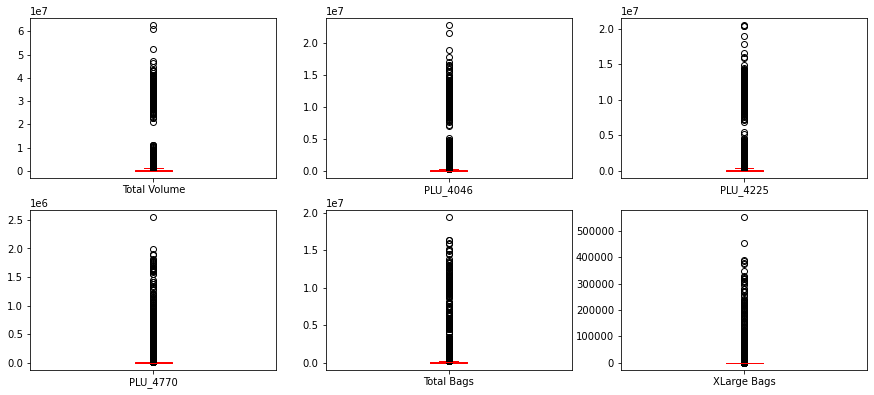

In [60]:
num_data = avocado_ds_analysis_data[["Total Volume","PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","XLarge Bags"]]

num_data.plot(kind = "box", subplots = True, layout=(3,3), figsize = (15,10), color='Red');

All numeric columns are full with outlier let treat them but before doing that we will encode cateorical variables.

# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

lb = LabelEncoder()
lb.fit(avocado_ds["region"])

avocado_ds["region"] = lb.transform(avocado_ds["region"])

In [33]:
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,conventional,2015,0


In [34]:
avocado_ds.tail(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,0.0,organic,2018,53
18240,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,0.0,organic,2018,53
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,0.0,organic,2018,53
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,0.0,organic,2018,53
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,0.0,organic,2018,53
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,organic,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,0.0,organic,2018,53


In [35]:
# Treating the outlier with zscore and delete the date and year columns, i kept it for EDA purpose.
avocado_ds.drop(columns=["Date","year","type"],axis = 1,inplace = True)

score = np.abs(zscore(avocado_ds))

new_avocado_ds = avocado_ds[(score <3).all(axis = 1)]

# how much data lost post outlier treamement

data_loss = len(new_avocado_ds)/len(avocado_ds)
print(1- data_loss," data we lost after outlier treatment")

0.028001534330648226  data we lost after outlier treatment


we have corrected the outlier using the z score and seen that we have lost 4.5% data approx and it seem ok to lose.

In [36]:
from sklearn.preprocessing import power_transform
select_data =new_avocado_ds[["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"]]

print("before",select_data.skew())
select_data = power_transform(select_data,method='yeo-johnson', standardize=False)
tranform_data = pd.DataFrame(select_data)
print("after",tranform_data.skew())

before PLU_4046       4.628222
PLU_4225       4.262080
PLU_4770       4.919251
XLarge Bags    6.063918
dtype: float64
after 0   -0.037857
1   -0.044224
2    0.022830
3    0.839903
dtype: float64


In [37]:
# checking the name of the columsn becaue after power_transform it get convert into numpy array and index value assigned to columns.
tranform_data.rename(columns = {0:"trans_PLU_4046",1:"trans_PLU_4225",2:"trans_PLU_4770",3:"trans_Xlarge Bags"}, inplace = True)
# joining transformed data 

new_avocado_ds = pd.concat([new_avocado_ds,tranform_data],axis = 1,join = "inner")

# since transformed features are added in the data so we need to deleted original one to avoid duplicacy
new_avocado_ds.drop(columns =["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"],axis =1, inplace =True)


In [38]:
new_avocado_ds.skew()

AveragePrice         0.402183
Total Volume         3.697542
Total Bags           4.479318
region               0.021079
trans_PLU_4046      -0.019568
trans_PLU_4225      -0.035632
trans_PLU_4770       0.030491
trans_Xlarge Bags    0.870667
dtype: float64

In [39]:
new_avocado_ds["Total Volume"] = np.log1p(new_avocado_ds["Total Volume"])
new_avocado_ds["Total Bags"] = np.log1p(new_avocado_ds["Total Bags"])

In [40]:
new_avocado_ds.skew()

AveragePrice         0.402183
Total Volume        -0.068264
Total Bags          -0.372818
region               0.021079
trans_PLU_4046      -0.019568
trans_PLU_4225      -0.035632
trans_PLU_4770       0.030491
trans_Xlarge Bags    0.870667
dtype: float64

we had skewness in a few of the features in the dataset and which has been corrected by using power transform and two columns have been corrected by using log1p because while performing power transform on these two feature these were not getting conveted. Power transform return result in the form of array hence we had to rename the columns name after converting them into pandas data Frame.<br>
We took features serprataly which had high skewness and assigned them in other variable. performed power transform and concat  the transformed features into  original dataset by using pandas function.

<AxesSubplot:>

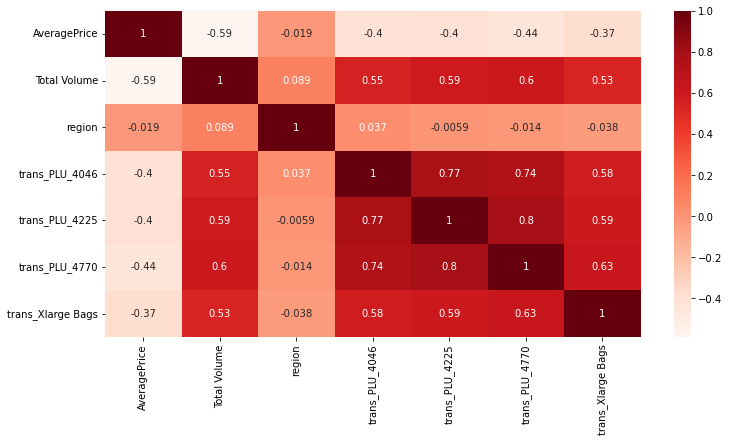

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True,cmap = 'Reds')

Total Volume and Total bags are highly correlated and we should drop one.


In [42]:
new_avocado_dsX_check = new_avocado_ds.copy()


In [43]:
new_avocado_ds.drop("Total Bags",axis =1, inplace = True)

<AxesSubplot:>

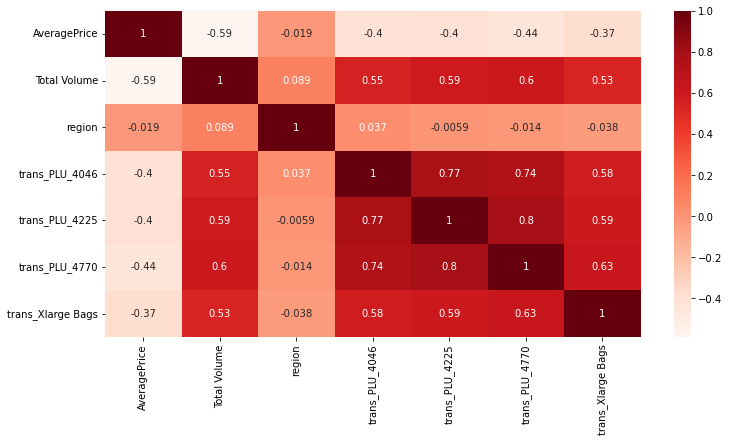

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True,cmap = 'Reds')

# Data is ready for "Modeling"

In [45]:
# seprate data into train and test and create model

X = new_avocado_ds.drop("AveragePrice",axis =1)
y =new_avocado_ds["AveragePrice"]

# Applying standard scaler to scale the data point.

sc = StandardScaler()
X = sc.fit_transform(X)


# we will find best random state wit this for loop.
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training_score",LR.score(X_train,y_train),"Random_state",i)
    pred = LR.predict(X_test)
    print("test_score",LR.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")
    



Training_score 0.3603600789277399 Random_state 50
test_score 0.36175744761978723
Mean_squared_error 0.09789300571189162
R2_scoe 0.36175744761978723 

Training_score 0.35696449665586827 Random_state 125
test_score 0.3757026092970025
Mean_squared_error 0.09365963696151895
R2_scoe 0.3757026092970025 

Training_score 0.3551452666701044 Random_state 200
test_score 0.3823646110063498
Mean_squared_error 0.09491765092945283
R2_scoe 0.3823646110063498 

Training_score 0.3601877664503592 Random_state 275
test_score 0.36266836705641026
Mean_squared_error 0.09621805005387336
R2_scoe 0.36266836705641026 

Training_score 0.36438336699173446 Random_state 350
test_score 0.3455119087983668
Mean_squared_error 0.09896125448615331
R2_scoe 0.3455119087983668 

Training_score 0.36270719885066116 Random_state 425
test_score 0.3519952955082648
Mean_squared_error 0.09699691835945794
R2_scoe 0.3519952955082648 



In [46]:
# testing
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9728773182098372 Random_state 50
test_score 0.8131146389438586
Mean_squared_error 0.02866429016540917
R2_scoe 0.8131146389438586 

Training_score 0.9736550859226598 Random_state 100
test_score 0.8028686359914272
Mean_squared_error 0.029313987202553685
R2_scoe 0.8028686359914272 

Training_score 0.9727339492200004 Random_state 150
test_score 0.8088218449718747
Mean_squared_error 0.02891624529889727
R2_scoe 0.8088218449718747 

Training_score 0.9732853451214518 Random_state 200
test_score 0.8034880534294764
Mean_squared_error 0.030199779158444573
R2_scoe 0.8034880534294764 

Training_score 0.9727706324551476 Random_state 250
test_score 0.8090239445287766
Mean_squared_error 0.0302137821125943
R2_scoe 0.8090239445287766 

Training_score 0.9728451618712965 Random_state 300
test_score 0.8032231371559331
Mean_squared_error 0.03022807206616367
R2_scoe 0.8032231371559331 

Training_score 0.9730031012514273 Random_state 350
test_score 0.8080148691483318
Mean_squared_error 0.0290

In [47]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9726641420309038 Random_state 50
test_score 0.8120276834669482
Mean_squared_error 0.028831006311665703
R2_scoe 0.8120276834669482 

Training_score 0.9735359638230869 Random_state 100
test_score 0.8056664697916248
Mean_squared_error 0.028897941462565295
R2_scoe 0.8056664697916248 

Training_score 0.9727882008259403 Random_state 150
test_score 0.808170896234093
Mean_squared_error 0.02901470316598955
R2_scoe 0.808170896234093 

Training_score 0.9733135264822845 Random_state 200
test_score 0.8061694838283862
Mean_squared_error 0.029787699347069055
R2_scoe 0.8061694838283862 

Training_score 0.9729343895231085 Random_state 250
test_score 0.8095780421194727
Mean_squared_error 0.030126119898432956
R2_scoe 0.8095780421194727 

Training_score 0.9724593152391996 Random_state 300
test_score 0.8047780808493405
Mean_squared_error 0.02998920785548462
R2_scoe 0.8047780808493405 

Training_score 0.9731945341714109 Random_state 350
test_score 0.8096005385484468
Mean_squared_error 0.028

we have check two algorithm for checking the best random stats. linear regression didnt work well so i tried Randomforest, it is giving somewhat good test score and found best random state.so we will used other model with that randomforest 

In [48]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state =450)
    model.fit(X_train,y_train)
    print("Training_score",model.score(X_train,y_train),"Algorithm",model)
    pred = model.predict(X_test)
    print("test_score",model.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.3594323722035345 Algorithm LinearRegression()
test_score 0.3656355574751615
Mean_squared_error 0.09609148291048902
R2_scoe 0.3656355574751615 

Training_score 0.3594323696641841 Algorithm Ridge()
test_score 0.365633514516161
Mean_squared_error 0.09609179237133948
R2_scoe 0.365633514516161 

Training_score 0.0 Algorithm Lasso()
test_score -4.5272832748022296e-05
Mean_squared_error 0.15148363748392268
R2_scoe -4.5272832748022296e-05 

Training_score 0.9729851188753336 Algorithm RandomForestRegressor()
test_score 0.8057570643417229
Mean_squared_error 0.029423294373186307
R2_scoe 0.8057570643417229 

Training_score 0.3919973634904427 Algorithm AdaBoostRegressor()
test_score 0.39208030071729827
Mean_squared_error 0.0920857183641501
R2_scoe 0.39208030071729827 

Training_score 1.0 Algorithm DecisionTreeRegressor()
test_score 0.6370660948325877
Mean_squared_error 0.054976059199071385
R2_scoe 0.6370660948325877 

Training_score 0.49680902983273467 Algorithm SVR()
test_score 0.

KNN is giving best score on trainin as well test so i am selecting it for final model and applying GridSearchCV. Randomforest is kind of overfit model.

In [49]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train1,y_train1)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


In [50]:
grid_search_RF.best_score_

0.5078205431055814

In [51]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train1,y_train1)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [52]:
grid_search_KNN.best_score_

0.7604882888957685

we have got the best parameter through Grid Search CV, appying cross_val_score

In [53]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


At 2 mean is  -0.22900506318463287 and the SD is  0.04318284716924638


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 3 mean is  -0.11131265480148227 and the SD is  0.028368019254949268


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 4 mean is  -0.10698271510825866 and the SD is  0.03036837791690765


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 5 mean is  -0.1015246204226139 and the SD is  0.03143552400635198


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 6 mean is  -0.09814509823969146 and the SD is  0.04091011192115481


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 7 mean is  -0.09716011639246767 and the SD is  0.038897223340366535


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 8 mean is  -0.09718574671083001 and the SD is  0.03704829491890314


C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\GURST\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

At 9 mean is  -0.09796724208741674 and the SD is  0.04139257008309394


In [54]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())


At 2 mean is  -0.3563191356618137 and the SD is  0.000776502743917773
At 3 mean is  -0.13747937660642737 and the SD is  0.022994342846130042
At 4 mean is  -0.14527153989423175 and the SD is  0.02710468716638193
At 5 mean is  -0.13668055849676414 and the SD is  0.03623319430782806
At 6 mean is  -0.1299518005915109 and the SD is  0.04541631819689351
At 7 mean is  -0.13032286863452916 and the SD is  0.040633793944686976
At 8 mean is  -0.12906784228416518 and the SD is  0.04052784279409999
At 9 mean is  -0.13182902383045236 and the SD is  0.04603260537851408


i have checked GridSreach CV on Randomforest and KNN. Using GridSreachCV on randomforest because it was overfit model and though of that by hyperparameter tuning we can save the overfitting but KNN is working robust in this situation.
we have seen that cross_val_score at 4 iteration, it isgood other than that. Thus it is the better that other. we will save the same model for future use.  

# Modeling saving

In [55]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)


# **Conclusion**<br>
As we already mentioned that dataset had lot of missing value which we handled. Outlier and skewness also get corrected.We have done analysis 
and check the trend also. i have checked correlation and VIF, it has observed that predictor are correlated thus multicolinerrity was in existance.it ought to be treated and we did that and data was ready for Modeling.<br><br>Dataset has been segrigated into train and test with best random state.<br>Data has been trained on multiple models like linear regression , ensemble methods. support vector machine and KNN, among all the algorithms, KNN has given good test and train accuracy.<br> KNN is picked as final Model and applied Gridsearch CV to find the best parameter to train it further.We got these {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} best parameter, i have used these parameter with cross_val_score and saved model with these parameter.     
